**Central Limit Theorem**

Consider a Huge Population data. We donot know if the population Data has Normal Distribution or Not..

To handle this we take multiple samples from the Population data


S1 =x1,x2,x3.....x50 ,Mean Sample =X1_bar

S2 =x1,x2,x3.....x50 ,Mean Sample =X2_bar

S3 =x1,x2,x3.....x50 ,Mean Sample =X3_bar

S4 =x1,x2,x3.....x50 ,Mean Sample =X4_bar

S5 =x1,x2,x3.....x50 ,Mean Sample =X5_bar

'
.
.
.
.
.
.
S50 =x1,x2,x3.....x50 ,Mean Sample =X50_bar


As per the **Central Limit Theorem** when we plot the Sample mean data from X1_bar to X50_bar ..we get a **Normal Distribution Curve**. irrespectiv eof the Population Distribution ,whether its a "Normal Distribution" or not a " normal Distribution".


Hence we get Mean=Median=Mode

The Normal Distribution graph contains Sample Means from X1_bar to X50_bar on the X-axis.

Practical Implementation of the Central Limit Theorem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_excel('/content/fraud_data.xlsx')

In [3]:
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [4]:
data.shape

(14446, 15)

In [5]:
population_mean = data['amt'].mean()
print('Population mean: ', population_mean)

Population mean:  124.43007337671327


In [6]:
sample =data['amt'].sample(n=1000,random_state=42) ##random_sate =42 ..indicates we get the same sample everytime we run the code
sample_mean =sample.mean()
print("Sample Mean:",sample_mean)

Sample Mean: 119.54582999999998


Impact of sample Size on Sample mean :As the Sample size increases the Sample Mean becomes a better estimator of the Population Mean.This is one of the key ideas of **Central Limit Theorem**

5000 to 7000 is better Sample Propotion to get the feel of the Population Mean.

In [7]:
sample_sizes  =[10,50,100,500,100,5000,7000]
sample_means=[]
sample_means =[data['amt'].sample(n=size,random_state=42).mean() for size in sample_sizes]

for size,mean in zip(sample_sizes,sample_means):
  print(f"Sample Size:{size},Sample Mean:{mean}")

Sample Size:10,Sample Mean:96.85499999999999
Sample Size:50,Sample Mean:88.3492
Sample Size:100,Sample Mean:81.8355
Sample Size:500,Sample Mean:112.06866000000001
Sample Size:100,Sample Mean:81.8355
Sample Size:5000,Sample Mean:123.99536800000001
Sample Size:7000,Sample Mean:126.52721


Visualize the Central Limit Theorem

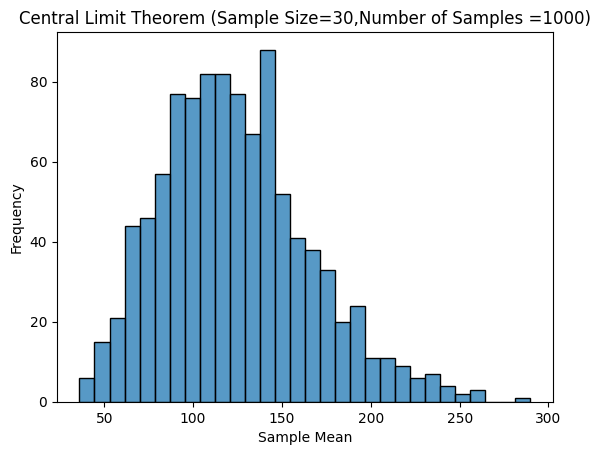

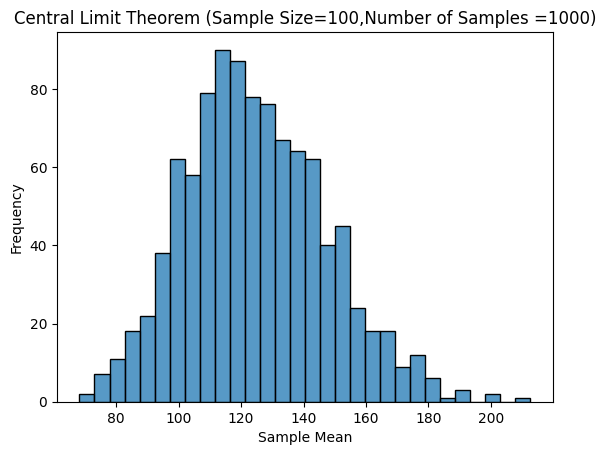

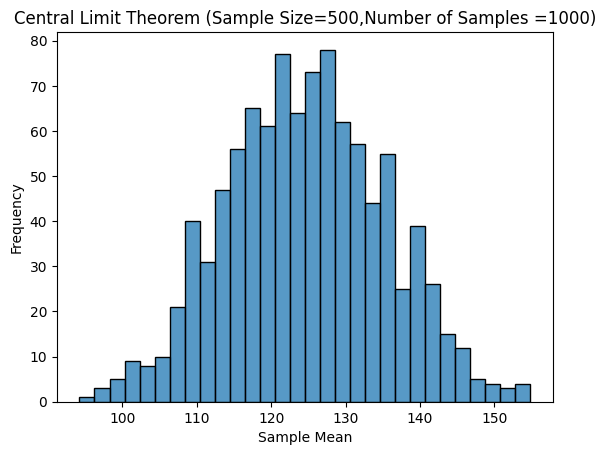

In [8]:
def visualize_clt(data,sample_size,num_samples):
  sample_means=[np.mean(np.random.choice(data,size=sample_size)) for  _ in range(num_samples)]
  sns.histplot(sample_means,bins=30,edgecolor="black")
  plt.title(f"Central Limit Theorem (Sample Size={sample_size},Number of Samples ={num_samples})")
  plt.xlabel("Sample Mean")
  plt.ylabel('Frequency')

  plt.show()

#function Call
visualize_clt(data['amt'],30,1000)
visualize_clt(data['amt'],100,1000)
visualize_clt(data['amt'],500,1000)


Minimum sample size should be 30..

What is the differenc ebetween Sample Mean and Sampling Distribution Mean?


A: Sample Mean :The mean of a single Sample(Of any Sample Size)

X1_bar =Sample mean(of single Sample S1)

Sample Distribution Mean :The mean of all Sample means which approximates to the Population Mean

Example: sample_distribution_mean= mean(X1_bar,X2_bar,X3_bar.......Xn_bar)  which nearly approximates to the Population Mean(mu)

In [9]:
sampling_distribution_mean = np.mean(sample_means)
print("Sampling Distribution Mean:",sampling_distribution_mean)

Sampling Distribution Mean: 101.63806257142856


Note : Mean of Sampling Distribution Mean is approximately equal to the Population Mean

What is Standard Deviation of the Sample Mean Distribution?

A.If sigma is the Std Devaition of the Population, the Std Deviation of Sample Mean Distribution = sigma/SQRT(n)..where n is the each Sample Size.This is called as "Standard Error"

Std Deviation and Std Error are related to each other ,but there is a Huge Difference...

Std Deviation - It is a measure of spread of Individual Data Points in a Population.

Std Error - It is a measure of spread of Sample Means around the Population mean




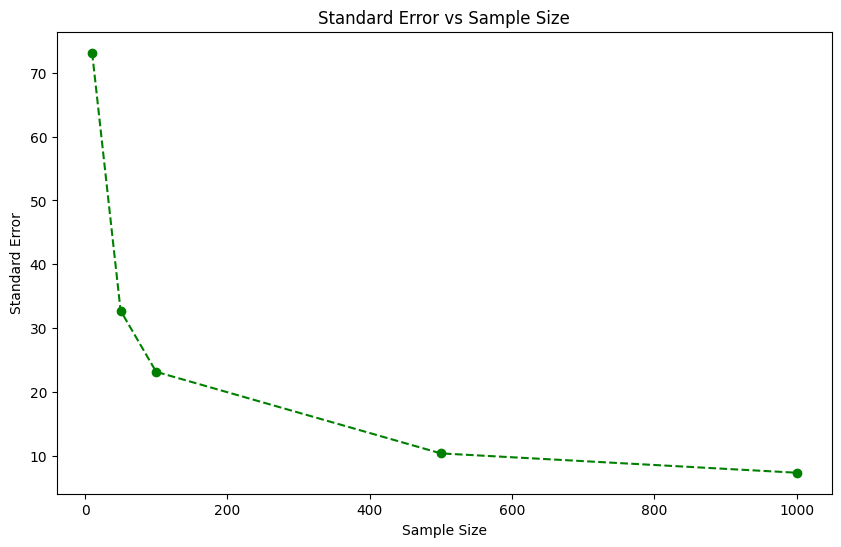

In [10]:
population_Std_deviation =data['amt'].std()

sample_sizes =[10,50,100,500,1000]
std_error =[population_Std_deviation/np.sqrt(sample_size) for sample_size in sample_sizes]
plt.figure(figsize=(10,6))
plt.plot(sample_sizes,std_error,marker='o',linestyle='--',color='green')
plt.title("Standard Error vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Standard Error")
plt.show()


Infrence from the above plot:

Std Error reduces as we increase the Sample Size.



**Real Time Use Cases**


1. Food Delivery Apps -Delivery Time for any Individual Orders is **Not a Normal Distribution** -- This because ,few delivarables may take 15 minutes and there may be few deliverables that may take more than 60 minutes ,
which means it will **Right Skewed.**


Company usually takes random samples of the delivery time

1. S1 ----collect 50 random delivarable times and find the sample mean for S1 ==> X1_bar(average time).

2. S2 ----collect 50 random delivarable times and find the sample mean for S2 ==> X2_bar(average time);

.
.
.
.
S1000 --collect 50 random delivarable times and find the sample mean for S1000 ==> X1000_bar(average time).

When these Sample means are plotted ,we find that it gives a Normal Distribution Curve Or a Gaussian Curve..


Sinc ethe distribution is **Normal** ,we can get the **Confidence Interval **and do the **Hypothesis testing**

reliable Predictions can be done for the Delivery time,since we get X_bar ~ mu
